In [87]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
data1= pd.read_csv('kc_house_data.csv')

In [89]:
data1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Lets investigate the relationship between the year the house was created and its present cost

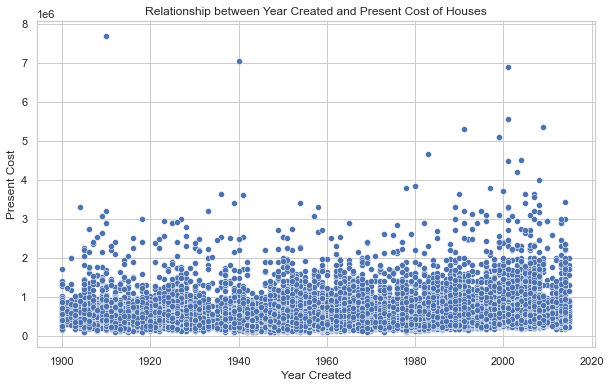

In [90]:
sns.set(style='whitegrid')  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the scatter plot
sns.scatterplot(data=data1, x='yr_built', y='price', marker='o', color='b')

# Set labels and title
plt.xlabel('Year Created')
plt.ylabel('Present Cost')
plt.title('Relationship between Year Created and Present Cost of Houses')

# Show the plot
plt.show()


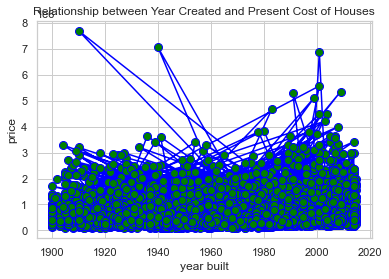

In [91]:
plt.xlabel('year built')
plt.ylabel('price')
plt.title('Relationship between Year Created and Present Cost of Houses')
plt.plot(data1['yr_built'], data1['price'], color = 'blue',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'green', markersize = 8)

In [92]:
from statsmodels.formula.api import ols
formula = 'yr_built ~ price'
simple_model=ols(formula,data1).fit()
model_sum=simple_model.summary()
print(model_sum)
print('')
print(f'The correlation between the year the house was built and price they were sold for is :',data1.corr()['yr_built']['price'])

                            OLS Regression Results                            
Dep. Variable:               yr_built   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.12e-15
Time:                        10:16:10   Log-Likelihood:            -1.0361e+05
No. Observations:               21597   AIC:                         2.072e+05
Df Residuals:                   21595   BIC:                         2.072e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1968.6687      0.355   5545.655      0.0

In [93]:
#As we can see, the R squared value is at 0.0003 showing that there is negligable relation while the correlation is 0.0539 
#which indicates almost 0 correlation

# Lets investigate the relationship between the zipcode(location) and the present cost

<function matplotlib.pyplot.show(close=None, block=None)>

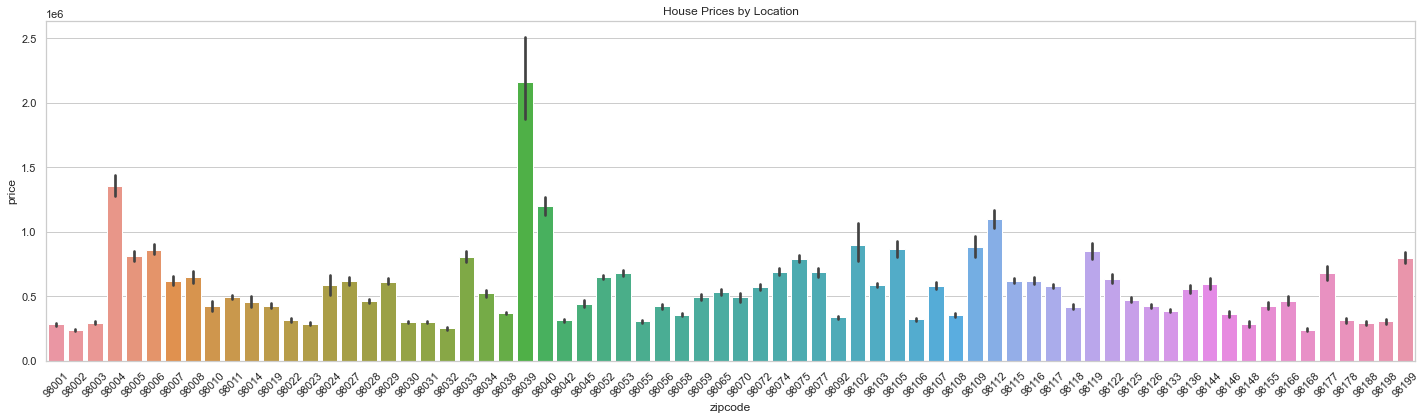

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6)) 


plt.title('House Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price')


sns.barplot(x='zipcode', y='price', data=data1, ax=axes)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45) 


plt.tight_layout() 
plt.show
#As we can observe the price varies with the location

In [95]:
#lets sort the zipcodes(location) in accordance to the most expesnsive to the least expensive
data3=data1.sort_values(by=['price'], ascending=False)
data3=data3[['price','zipcode']]
data3=(data3.reset_index()).drop(['index'],axis = 1)
data3.head(20)

,price,zipcode
0,7700000.0,98102
1,7060000.0,98004
2,6890000.0,98039
3,5570000.0,98039
4,5350000.0,98004
5,5300000.0,98040
6,5110000.0,98033
7,4670000.0,98040
8,4500000.0,98155
9,4490000.0,98004


In [96]:
#Now let us try create a model of the prices against the location

#importing relevant libraries

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [97]:
#assigning variables the data
x= data3['zipcode'].values.reshape(-1,1)
y= data3['price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=50,train_size=0.80,shuffle=True)

Findig the train size, test size and total size

In [98]:
#train size
print(f'Train size: {int(0.80 * len(x))}')
print(f'Test size: {int(0.20 * len(x))}')
print(f'Total size: {len(x)}')

Train size: 17277
Test size: 4319
Total size: 21597


Linear Regression

In [99]:

#Training the Algorithm
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#Lets see the formulated intercept and slope
print('intercept: ',regressor.intercept_)
print('Slope: ',regressor.coef_)

intercept:  39486451.024993025
Slope:  [-397.08673547]


In [100]:
# Mean absolute error

ypred = regressor.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(xtrain, ytrain))

# Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(xtrain, ytrain))

# Most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(xtrain, ytrain)))

Mean Absolute Error: 442990.99988423917
Mean Squared Error: 331792913942.66534
Root Mean Squared Error: 576014.6820547766


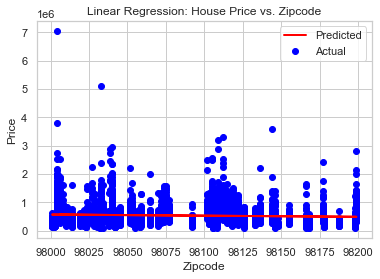

In [101]:
# Scatter plot of the actual data points
plt.scatter(xtest, ytest, color='blue', label='Actual')

# Regression line
plt.plot(xtest, ypred, color='red', linewidth=2, label='Predicted')

plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression: House Price vs. Zipcode')
plt.show()


In [102]:
import pandas as pd

# Create a DataFrame to store the actual and predicted values
prediction_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})

# Display the DataFrame
print(prediction_df)


         Actual      Predicted
3879   732000.0  569568.428784
12341  415000.0  563215.041017
5329   649950.0  525888.887883
19235  250000.0  513976.285819
14722  354000.0  543360.704243
...         ...            ...
8012   539000.0  529462.668502
18912  258000.0  571553.862461
16877  305000.0  562817.954281
2518   845000.0  531448.102179
8306   530000.0  556861.653249

[4320 rows x 2 columns]


In [106]:
formula = 'price ~ zipcode'
simple_model=ols(formula,data3).fit()
model_sum=simple_model.summary()
print(model_sum)
print('')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.06e-15
Time:                        10:18:05   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.65e+07   4.58e+06      7.977      0.0

In [103]:
#From the above analysis we see a signficant difference between the actual and predicted values showing that zipcode(location) 
# will not be sufficient to create an accurate model